In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [3]:
import tensorflow_datasets as tfds

tfds.disable_progress_bar()

train_ds, validation_ds, test_ds = tfds.load("cats_vs_dogs",

split=["train[:40%]", "train[40%:50%]", "train[50%:60%]"],

as_supervised=True)

print(f'Number of training samples: {tf.data.experimental.cardinality(train_ds)}')

print(f'Number of validation samples: {tf.data.experimental.cardinality(validation_ds)}')

print(f'Number of test samples: {tf.data.experimental.cardinality(test_ds)}')

Dataset cats_vs_dogs downloaded and prepared to ~/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.
Number of training samples: 9305
Number of validation samples: 2326
Number of test samples: 2326


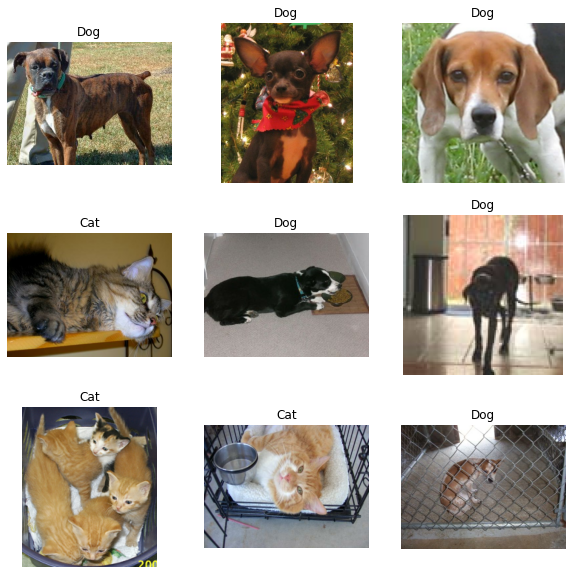

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for i, (image, label) in enumerate(train_ds.take(9)):

  ax = plt.subplot(3, 3, i + 1)

  plt.imshow(image)

  plt.title('Cat' if int(label) == 0 else 'Dog')

  plt.axis("off")

In [5]:
size = (150, 150)

train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))

validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size), y))

test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))

In [6]:
batch_size = 32

train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)

validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)

test_ds = test_ds.cache().batch(batch_size).prefetch(buffer_size=10)

In [7]:
from tensorflow import keras

from tensorflow.keras import layers

data_augmentation = keras.Sequential(

[layers.experimental.preprocessing.RandomFlip("horizontal"),

layers.experimental.preprocessing.RandomRotation(0.1),])

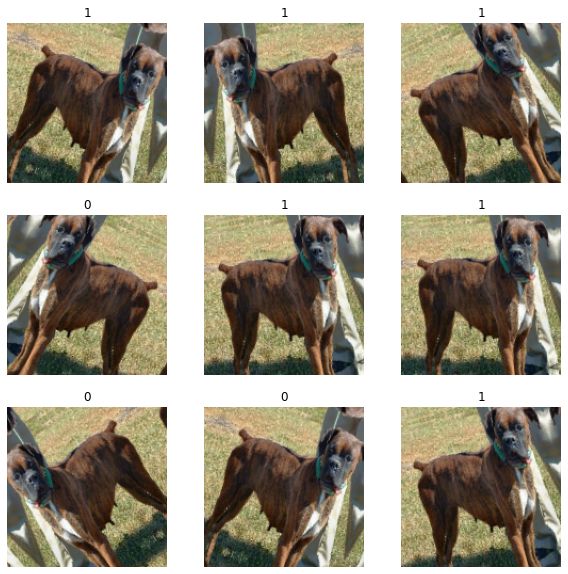

In [8]:
import numpy as np

for images, labels in train_ds.take(1):

  plt.figure(figsize=(10, 10))

  first_image = images[0]

for i in range(9):

  ax = plt.subplot(3, 3, i + 1)

  augmented_image = data_augmentation(

  tf.expand_dims(first_image, 0), training=True

  )

  plt.imshow(augmented_image[0].numpy().astype("int32"))

  plt.title(int(labels[i]))

  plt.axis("off")

In [9]:
base_model = keras.applications.Xception(

weights="imagenet",

input_shape=(150, 150, 3),

include_top=False,

)

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

x = data_augmentation(inputs) 

scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)

x = scale_layer(x)

x = base_model(x, training=False)

x = keras.layers.GlobalAveragePooling2D()(x)

x = keras.layers.Dropout(0.2)(x)

outputs = keras.layers.Dense(1)(x)

model = keras.Model(inputs, outputs)

model.summary()

83683744/83683744 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0      

In [10]:
base_model = keras.applications.Xception(

weights="imagenet",

input_shape=(150, 150, 3),

include_top=False,

)


base_model.trainable = False


inputs = keras.Input(shape=(150, 150, 3))

x = data_augmentation(inputs)


scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)

x = scale_layer(x)

x = base_model(x, training=False)

x = keras.layers.GlobalAveragePooling2D()(x)

x = keras.layers.Dropout(0.2)(x) 

outputs = keras.layers.Dense(1)(x)

model = keras.Model(inputs, outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                           

In [ ]:
base_model.trainable = True

model.summary()

model.compile(

optimizer=keras.optimizers.Adam(1e-5),

loss=keras.losses.BinaryCrossentropy(from_logits=True),

metrics=[keras.metrics.BinaryAccuracy()],

)

epochs = 10

model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                           